# Feature Selection

In [9]:
import pandas as pd

In [18]:
data = {
    "F1": [1,2,3,-1,-2,4,1.5,3.25],
    "F2": [2,2,1,1,3,1,2,4],
    "F3": [3.5,4.5,4.5,0.5,1.5,5.5,3.5,7.25],
    "F4": [0.75,-0.25,1.75,1.75,4.75,2.75,0.25,0.5],
    "Target Value": [1.5,1.5,1,1,2,1,1.5,2.5]
}

# Load data into a DataFrame object:
df = pd.DataFrame(data)

print(df.corr())

                    F1        F2        F3        F4  Target Value
F1            1.000000 -0.095942  0.898559 -0.452684     -0.095942
F2           -0.095942  1.000000  0.343122 -0.041178      1.000000
F3            0.898559  0.343122  1.000000 -0.414561      0.343122
F4           -0.452684 -0.041178 -0.414561  1.000000     -0.041178
Target Value -0.095942  1.000000  0.343122 -0.041178      1.000000


In [20]:
# Apply filter methods 
cor = df.corr()

# Pearson method
df.corr(method ='pearson')

,F1,F2,F3,F4,Target Value
F1,1.000000,-0.095942,0.898559,-0.452684,-0.095942
F2,-0.095942,1.000000,0.343122,-0.041178,1.000000
F3,0.898559,0.343122,1.000000,-0.414561,0.343122
F4,-0.452684,-0.041178,-0.414561,1.000000,-0.041178
Target Value,-0.095942,1.000000,0.343122,-0.041178,1.000000


<AxesSubplot:>

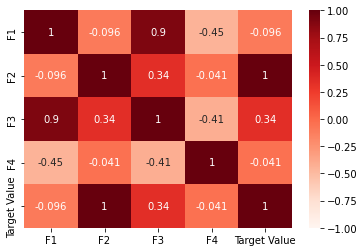

In [25]:
cor = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds, vmax=1,      
    vmin=-1) 

Pearson Correlation equation:

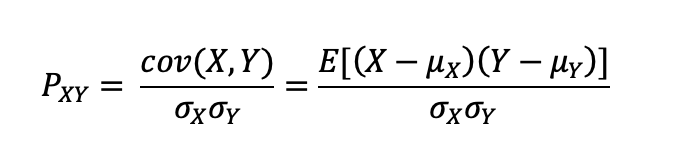

#### Feature Selection by covariance: 
Calculate the Pearson correlation coefficients and select the best two features using the correlation results.

In [27]:
# Correlation Coeeficient with the Target Value
cor_T = abs(cor["Target Value"])

print(cor_T)

F1              0.095942
F2              1.000000
F3              0.343122
F4              0.041178
Target Value    1.000000
Name: Target Value, dtype: float64


From the above table results, the two best features are F2 and F3. 

If selected features have high correlation with each other then use another filter method.

In [28]:
print(df[["F2","F3"]].corr())

          F2        F3
F2  1.000000  0.343122
F3  0.343122  1.000000


F2 should be sufficient at this point.

# Wrapper Methods

Perform a scikit-learn Recursive Feature Elimination (RFE)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [88]:
model = LinearRegression()

n_features_to_select = 4
rfe = RFE(model, n_features_to_select=n_features_to_select)
rfe.fit(df[["F1","F2","F3","F4"]],df[["Target Value"]])

# Another option:
# x = df.values[:,0:4]
# y = df.values[:,4:5]

#rfe = RFE(model,2)
#rfe.fit(x,y)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True]
[1 1 1 1]
